<a href="https://www.kaggle.com/code/pollukenpinedo/house-prices-eda?scriptVersionId=163028996" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# About The team

Team members:
* Anaelle 
* Santiago 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Load data
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
# Preview data
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


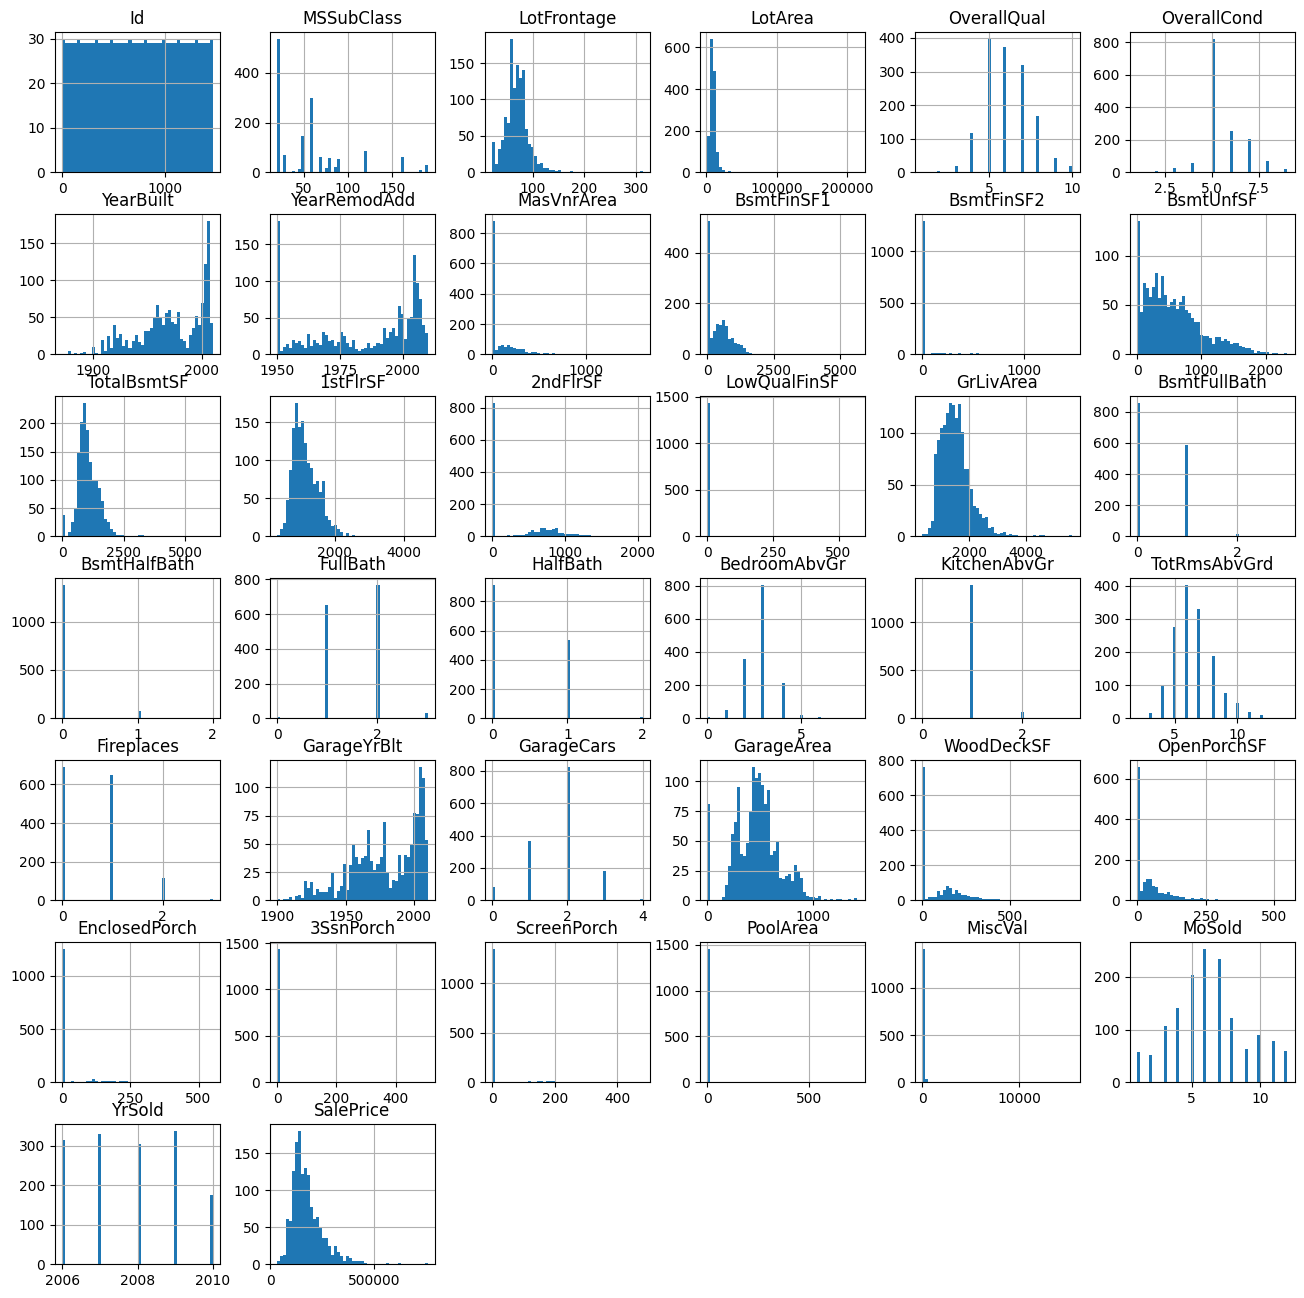

In [5]:
# Chart overview
train.hist(bins=50, figsize=(16,16))
plt.show()

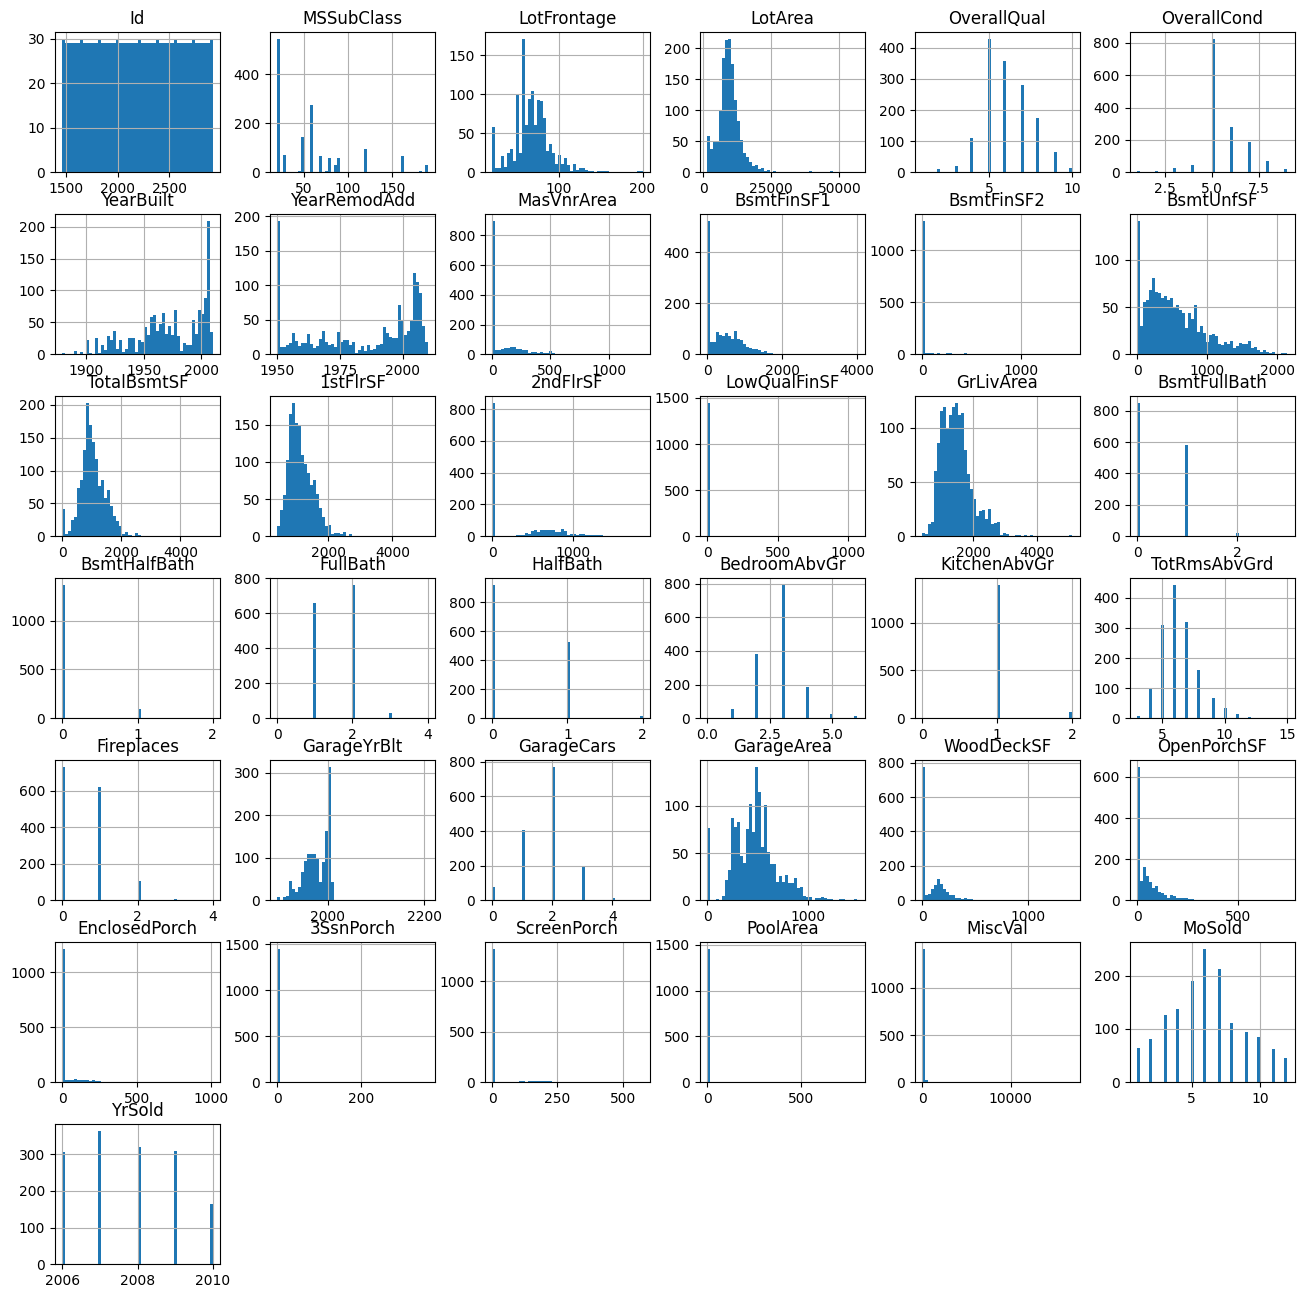

In [6]:
# Chart overview
test.hist(bins=50, figsize=(16,16))
plt.show()

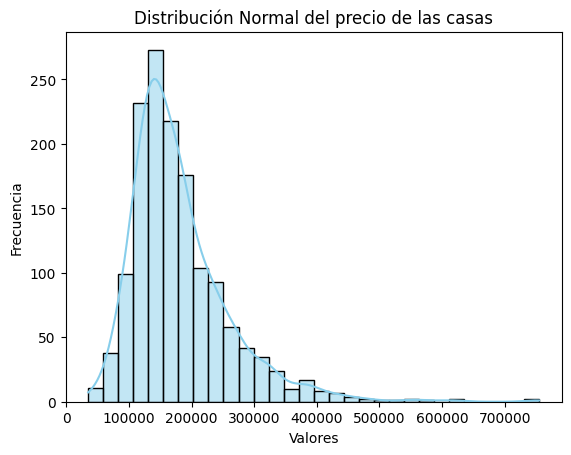

In [7]:
# Crear el gráfico de distribución (campana de Gauss)
sns.histplot(train.SalePrice, kde=True, color='skyblue', bins=30)

# Personalizar el gráfico
plt.title('Distribución Normal del precio de las casas')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico 
plt.show()

#Grafico para mostrar la distribucion de los precios de las casas

In [8]:
print(train.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


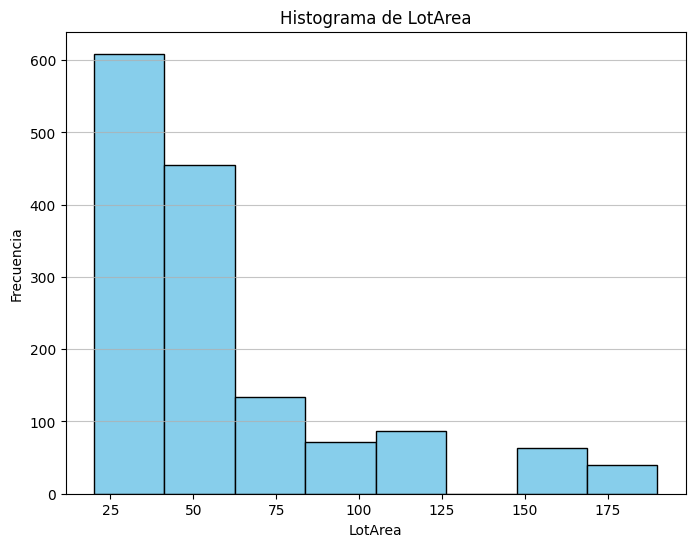

In [9]:
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(train.MSSubClass,bins =8, color='skyblue', edgecolor='black')
# Personalizar el histograma
plt.title(f'Histograma de LotArea')
plt.xlabel('LotArea')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# Mostrar el histograma
plt.show()

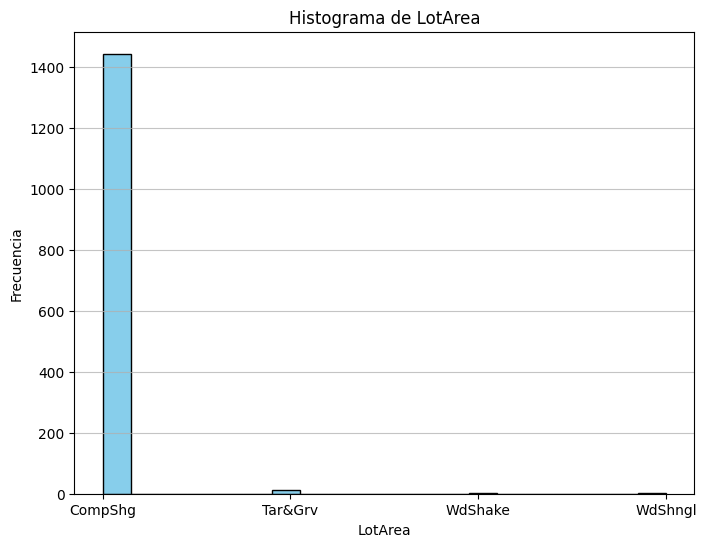

In [10]:
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(test.RoofMatl,bins =20, color='skyblue', edgecolor='black')
# Personalizar el histograma
plt.title(f'Histograma de LotArea')
plt.xlabel('LotArea')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# Mostrar el histograma
plt.show()

In [11]:
#Resumen estadistico
summary_stats = train.describe()
print(summary_stats)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

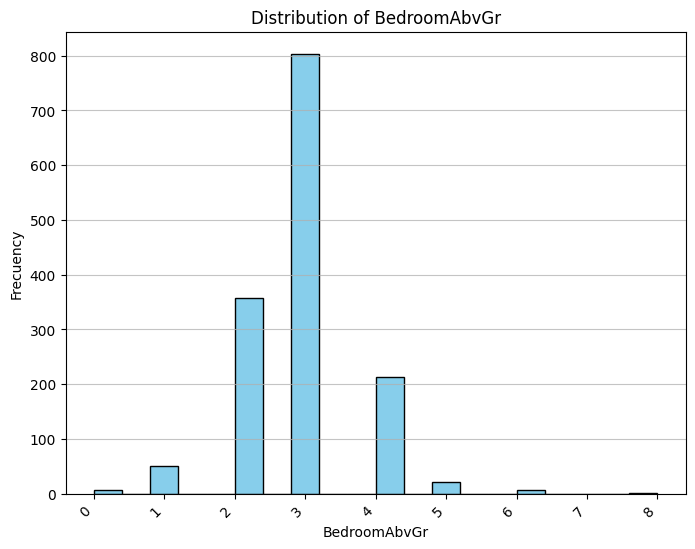

In [12]:
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(train.BedroomAbvGr,bins =20, color='skyblue', edgecolor='black')
# Personalizar el histograma
plt.title(f'Distribution of BedroomAbvGr')
plt.xlabel('BedroomAbvGr')
plt.ylabel('Frecuency')
plt.grid(axis='y', alpha=0.75)
# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')
# Mostrar el histograma
plt.show()

# Exploring no numeric variables

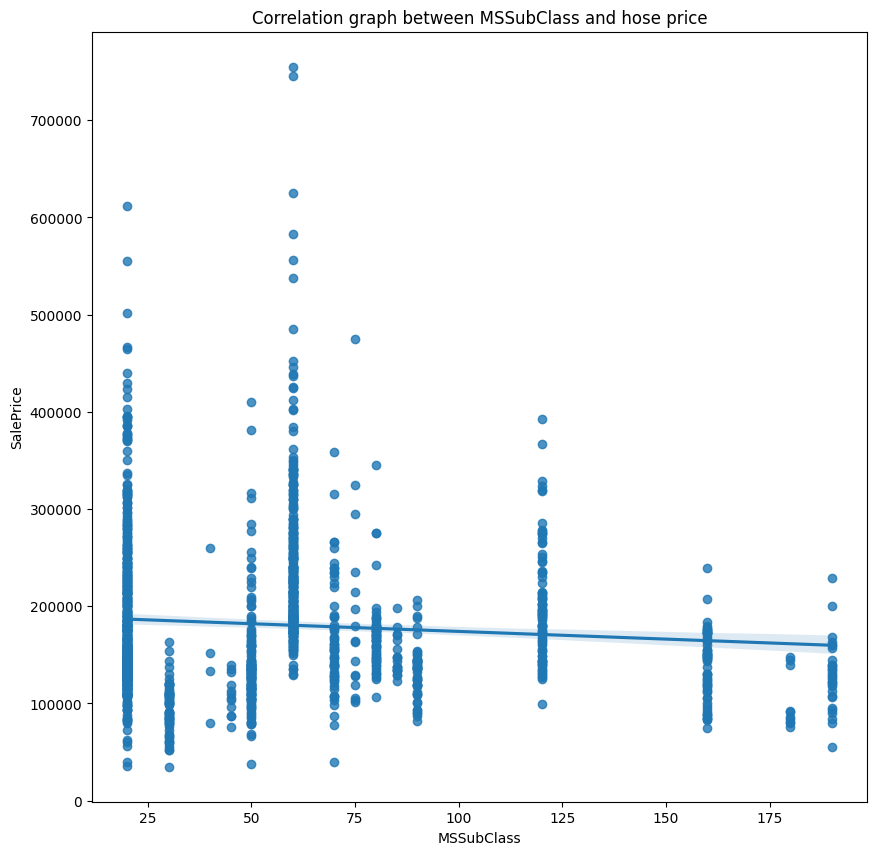

In [13]:

#Graph
plt.figure(figsize=(10,10))
sns.regplot(x='MSSubClass', y='SalePrice',data= train)

#Personalizacion del grafico
plt.title('Correlation graph between MSSubClass and hose price')
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')

plt.show()

### Neighborhood Distribution


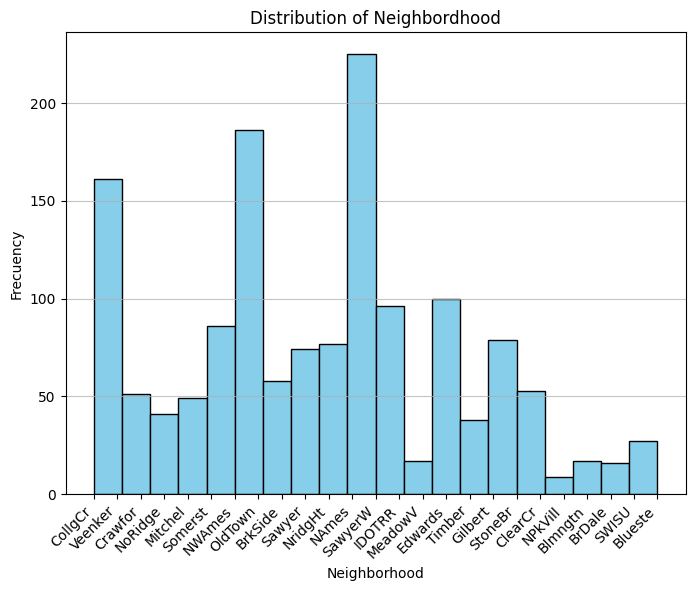

In [14]:
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(train.Neighborhood,bins =20, color='skyblue', edgecolor='black')
# Personalizar el histograma
plt.title(f'Distribution of Neighbordhood')
plt.xlabel('Neighborhood')
plt.ylabel('Frecuency')
plt.grid(axis='y', alpha=0.75)
# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')
# Mostrar el histograma
plt.show()

In [15]:
train['Numeric_neighborhood'] = train['Neighborhood'].astype('category').cat.codes
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Numeric_neighborhood
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,24
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,5
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,6
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,15


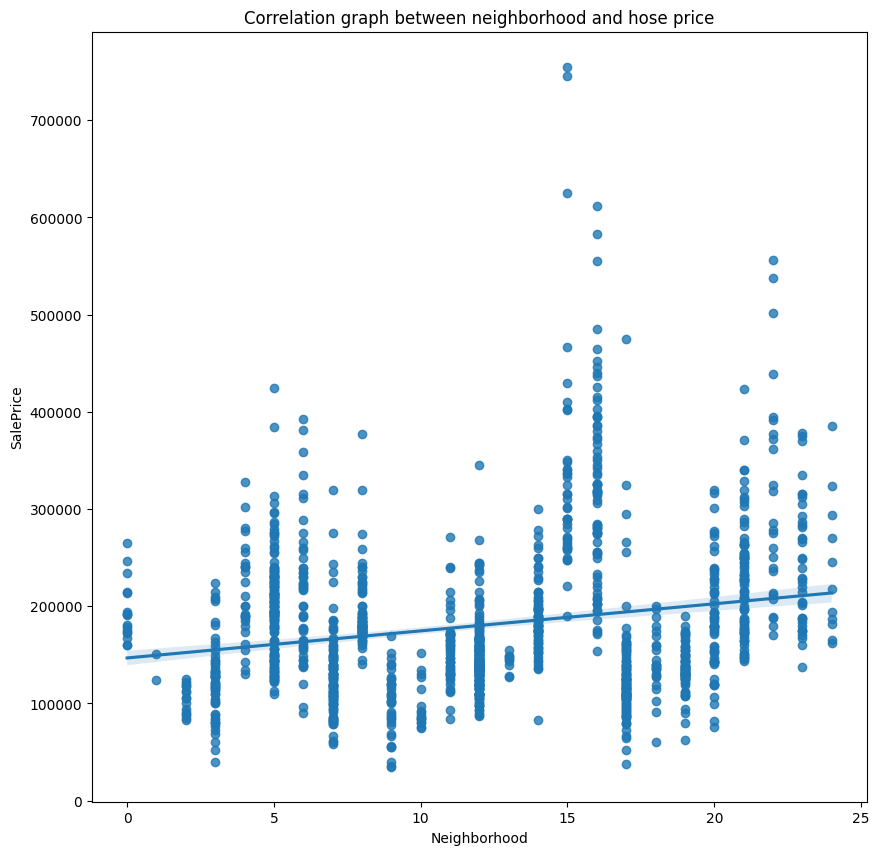

In [16]:

#Graph
plt.figure(figsize=(10,10))
sns.regplot(x='Numeric_neighborhood', y='SalePrice',data= train)

#Personalizacion del grafico
plt.title('Correlation graph between neighborhood and hose price')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')

plt.show()

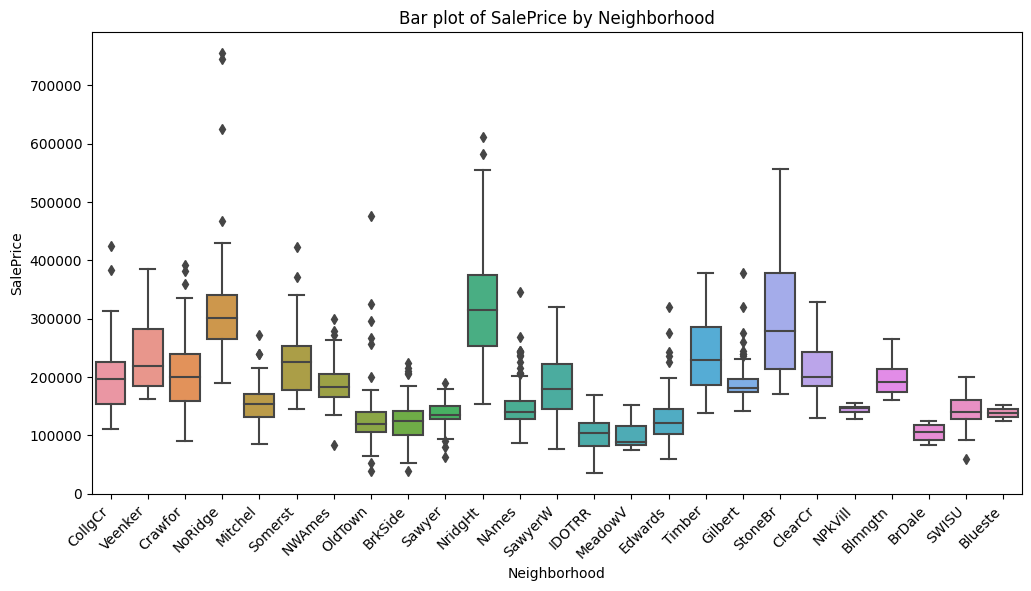

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)

# Personalización del gráfico
plt.title('Bar plot of SalePrice by Neighborhood')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


In [18]:
!pip install sweetviz

  Obtaining dependency information for sweetviz from https://files.pythonhosted.org/packages/89/50/8d3f7ca820267a38b42c64778db0f186d85cec6e3f0c5210eab9c16e783f/sweetviz-2.3.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 64.3 MB/s eta 0:00:00:00:0100:01


---
To explore al th variables at the same time we use the sweetviz library.
With these Library we are ready to choose some variables thate could be more relevants to use for the training of the model.

---

In [19]:
import sweetviz as sv

report =sv.analyze(train)
report.show_html("overview_report.html") # Mostrar y guardar el informe en un archivo HTML

                                             |          | [  0%]   00:00 -> (? left)

Report overview_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


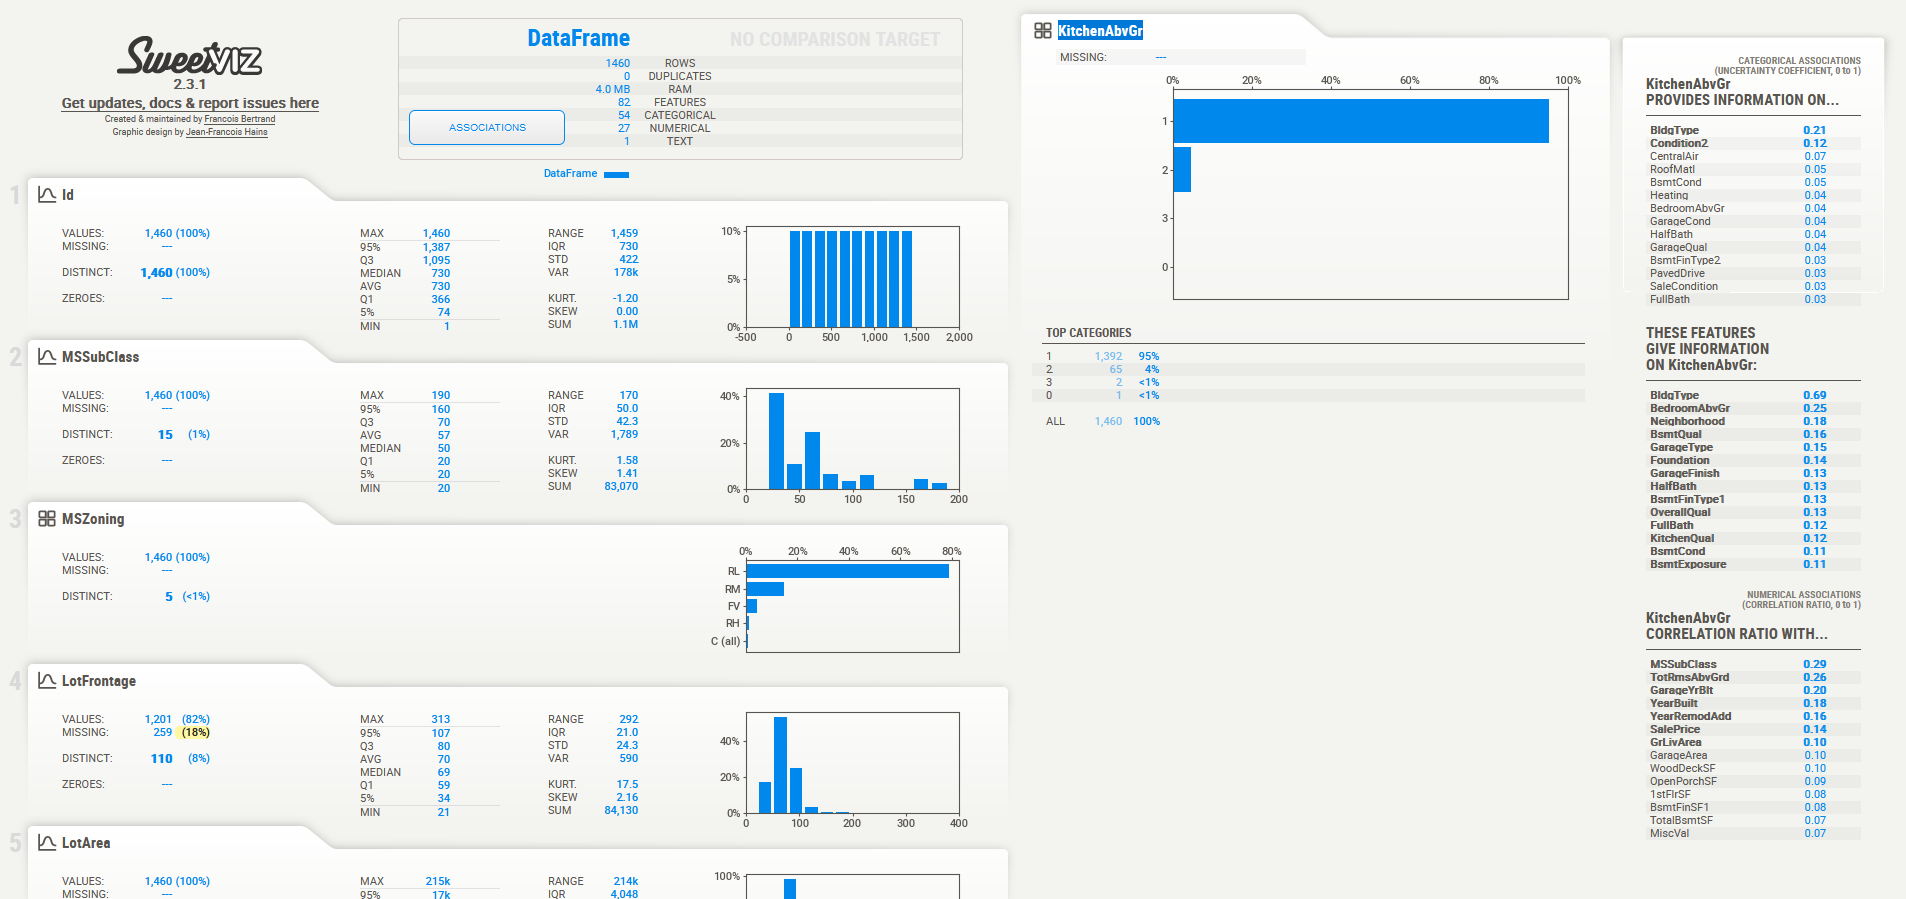

# Constructing new data Set For Train

After we choose the most relevant variables (those that have more than 0.6 of correlation ratio with sale Price) 
we're going to make the new data set for the training model first iteration.

In [38]:
selected_columns = ['OverallQual','Neighborhood','GrLivArea','GarageCars','ExterQual','BsmtQual','KitchenQual','GarageArea','TotalBsmtSF','1stFlrSF']
x_train_1 = train[selected_columns]
x_train_1.head()

,OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,BsmtQual,KitchenQual,GarageArea,TotalBsmtSF,1stFlrSF
0,7,CollgCr,1710,2,Gd,Gd,Gd,548,856,856
1,6,Veenker,1262,2,TA,Gd,TA,460,1262,1262
2,7,CollgCr,1786,2,Gd,Gd,Gd,608,920,920
3,7,Crawfor,1717,3,TA,TA,Gd,642,756,961
4,8,NoRidge,2198,3,Gd,Gd,Gd,836,1145,1145


In [39]:
#Seleccionar la columna de salida para el y_train (output)
y_train_1 = train['SalePrice']
print(y_train_1)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


# Applying data transforming

Now we have to make a data transformation for some columns, we can see that the columns ExterQual, BsmtQual, KitchenQual are examples of ordinal variables.
So we should convert them into numeric values.

In [40]:
#Haciendo un mapping  de las variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1
exterQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1
}

x_train_1.loc[:, 'ExterQual'] = x_train_1['ExterQual'].map(exterQual_mapping)
x_train_1.head()

,OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,BsmtQual,KitchenQual,GarageArea,TotalBsmtSF,1stFlrSF
0,7,CollgCr,1710,2,4,Gd,Gd,548,856,856
1,6,Veenker,1262,2,3,Gd,TA,460,1262,1262
2,7,CollgCr,1786,2,4,Gd,Gd,608,920,920
3,7,Crawfor,1717,3,3,TA,Gd,642,756,961
4,8,NoRidge,2198,3,4,Gd,Gd,836,1145,1145


In [41]:
#Haciendo un mapping  de las variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1 NA -> 0
BsmtQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1,
    'NA' : 0
}

x_train_1.loc[:, 'BsmtQual'] = x_train_1['BsmtQual'].map(exterQual_mapping)
x_train_1.head()

,OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,BsmtQual,KitchenQual,GarageArea,TotalBsmtSF,1stFlrSF
0,7,CollgCr,1710,2,4,4.0,Gd,548,856,856
1,6,Veenker,1262,2,3,4.0,TA,460,1262,1262
2,7,CollgCr,1786,2,4,4.0,Gd,608,920,920
3,7,Crawfor,1717,3,3,3.0,Gd,642,756,961
4,8,NoRidge,2198,3,4,4.0,Gd,836,1145,1145


In [42]:
#Haciendo un mapping  de las variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1
KitchenQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1
}

x_train_1.loc[:, 'KitchenQual'] = x_train_1['KitchenQual'].map(exterQual_mapping)
x_train_1.head()

,OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,BsmtQual,KitchenQual,GarageArea,TotalBsmtSF,1stFlrSF
0,7,CollgCr,1710,2,4,4.0,4,548,856,856
1,6,Veenker,1262,2,3,4.0,3,460,1262,1262
2,7,CollgCr,1786,2,4,4.0,4,608,920,920
3,7,Crawfor,1717,3,3,3.0,4,642,756,961
4,8,NoRidge,2198,3,4,4.0,4,836,1145,1145


In [44]:
#Finally we change de NaN values to Cero
x_train_1.fillna(0, inplace=True)

/tmp/ipykernel_41/1067093756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_1.fillna(0, inplace=True)


# Dividiendo el set TRAIN
---
Dividimos el set de datos en 2 paara obtener un conjunto de entrenamiento y otro de prueba con salidas reales y poder medir el desempeno del modelo.
---

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_train_1, y_train_1, test_size=0.3, random_state=42)

In [58]:
X_train.shape

(1022, 10)

In [59]:
X_test.shape

(438, 10)

In [60]:
#Convertirla columna neighborhood a una columna categorica.
X_train['Neighborhood'] = X_train['Neighborhood'].astype('category').cat.codes
X_train.head()

,OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,BsmtQual,KitchenQual,GarageArea,TotalBsmtSF,1stFlrSF
135,7,14,1682,2,3,3.0,3,530,1304,1682
1452,5,7,1072,2,3,4.0,3,525,547,1072
762,7,21,1547,2,3,4.0,4,614,756,764
932,9,21,1905,3,5,5.0,5,788,1905,1905
435,7,5,1661,2,4,4.0,4,550,799,827


In [61]:
#Convertirla columna neighborhood a una columna categorica.
X_test['Neighborhood'] = X_test['Neighborhood'].astype('category').cat.codes
X_test.head()

,OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,BsmtQual,KitchenQual,GarageArea,TotalBsmtSF,1stFlrSF
892,6,19,1068,1,3,3.0,3,264,1059,1068
1105,8,15,2622,2,4,5.0,4,712,1463,1500
413,5,17,1028,2,3,3.0,3,360,1008,1028
522,6,3,1664,2,3,3.0,3,420,1004,1004
1036,9,23,1620,3,4,5.0,5,912,1620,1620


In [70]:
#bibliotecas necesarias
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Crear y entrenar el modelo de regresión sobre bosques de decisión
modelo_rf = RandomForestRegressor(n_estimators=200, random_state=42)
modelo_rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo_rf.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predicciones)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 775444410.7331041


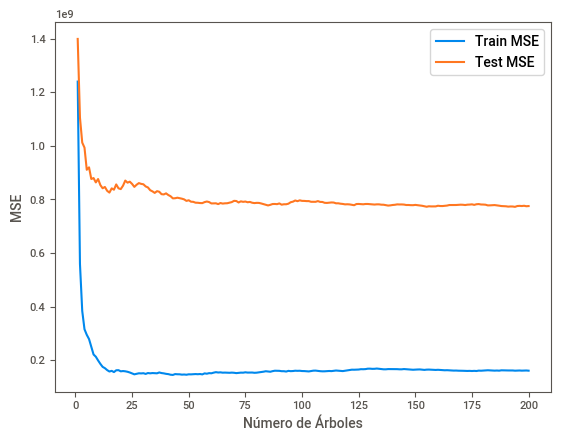

In [71]:
import matplotlib.pyplot as plt

mse_train = []
mse_test = []

for i in range(1, 201):  # Ajusta según el número de árboles
    modelo_rf.n_estimators = i
    modelo_rf.fit(X_train, y_train)
    pred_train = modelo_rf.predict(X_train)
    pred_test = modelo_rf.predict(X_test)
    mse_train.append(mean_squared_error(y_train, pred_train))
    mse_test.append(mean_squared_error(y_test, pred_test))

plt.plot(range(1, 201), mse_train, label='Train MSE')
plt.plot(range(1, 201), mse_test, label='Test MSE')
plt.xlabel('Número de Árboles')
plt.ylabel('MSE')
plt.legend()
plt.show()


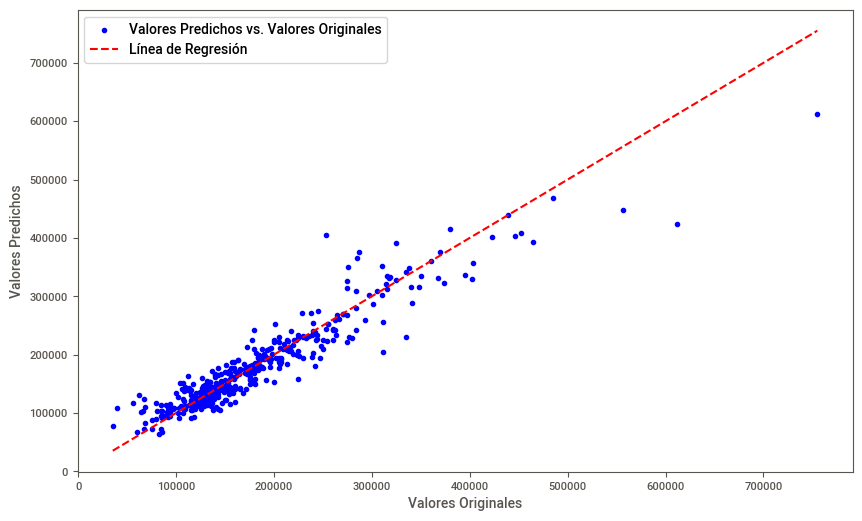

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Graficar valores predichos contra valores originales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones, color='blue', label='Valores Predichos vs. Valores Originales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de Regresión')
plt.xlabel('Valores Originales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.show()

# Procesing the Test DataSet

In [27]:
selected_columns = ['OverallQual','Neighborhood','GrLivArea','GarageCars','ExterQual','BsmtQual','KitchenQual','GarageArea','TotalBsmtSF','1stFlrSF']
x_test_1 = test[selected_columns]
x_test_1.head()

,OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,BsmtQual,KitchenQual,GarageArea,TotalBsmtSF,1stFlrSF
0,5,NAmes,896,1.0,TA,TA,TA,730.0,882.0,896
1,6,NAmes,1329,1.0,TA,TA,Gd,312.0,1329.0,1329
2,5,Gilbert,1629,2.0,TA,Gd,TA,482.0,928.0,928
3,6,Gilbert,1604,2.0,TA,TA,Gd,470.0,926.0,926
4,8,StoneBr,1280,2.0,Gd,Gd,Gd,506.0,1280.0,1280


In [28]:
#Haciendo un mapping  de las variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1
exterQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1
}

x_test_1.loc[:, 'ExterQual'] = x_test_1['ExterQual'].map(exterQual_mapping)
x_test_1.head()

,OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,BsmtQual,KitchenQual,GarageArea,TotalBsmtSF,1stFlrSF
0,5,NAmes,896,1.0,3,TA,TA,730.0,882.0,896
1,6,NAmes,1329,1.0,3,TA,Gd,312.0,1329.0,1329
2,5,Gilbert,1629,2.0,3,Gd,TA,482.0,928.0,928
3,6,Gilbert,1604,2.0,3,TA,Gd,470.0,926.0,926
4,8,StoneBr,1280,2.0,4,Gd,Gd,506.0,1280.0,1280


In [29]:
#Haciendo un mapping  de las variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1 NA -> 0
BsmtQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1,
    'NA' : 0
}

x_test_1.loc[:, 'BsmtQual'] = x_test_1['BsmtQual'].map(exterQual_mapping)
x_test_1.head()

,OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,BsmtQual,KitchenQual,GarageArea,TotalBsmtSF,1stFlrSF
0,5,NAmes,896,1.0,3,3.0,TA,730.0,882.0,896
1,6,NAmes,1329,1.0,3,3.0,Gd,312.0,1329.0,1329
2,5,Gilbert,1629,2.0,3,4.0,TA,482.0,928.0,928
3,6,Gilbert,1604,2.0,3,3.0,Gd,470.0,926.0,926
4,8,StoneBr,1280,2.0,4,4.0,Gd,506.0,1280.0,1280


In [30]:
#Haciendo un mapping  de las variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1
KitchenQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1
}

x_test_1.loc[:, 'KitchenQual'] = x_test_1['KitchenQual'].map(exterQual_mapping)
x_test_1.head()

,OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,BsmtQual,KitchenQual,GarageArea,TotalBsmtSF,1stFlrSF
0,5,NAmes,896,1.0,3,3.0,3.0,730.0,882.0,896
1,6,NAmes,1329,1.0,3,3.0,4.0,312.0,1329.0,1329
2,5,Gilbert,1629,2.0,3,4.0,3.0,482.0,928.0,928
3,6,Gilbert,1604,2.0,3,3.0,4.0,470.0,926.0,926
4,8,StoneBr,1280,2.0,4,4.0,4.0,506.0,1280.0,1280


In [32]:
#Finally we change de NaN values to Cero
x_test_1.fillna(0, inplace=True)

In [33]:
x_train_1.shape

(1460, 34)

In [34]:
y_train_1.shape

(1460,)

In [35]:
import numpy as np

# Supongamos que X es tu conjunto de datos y y es tu conjunto de salidas
x_train_1 = x_train_1.iloc[:-1, :]  # Elimina la última fila
y_train_1 = y_train_1.iloc[:-1]  # Elimina la última fila

# Training the Data Model

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.921e+10, tolerance: 9.207e+08
  model = cd_fast.enet_coordinate_descent(


Error Cuadrático Medio en el Conjunto de Prueba: 11670338219.274794


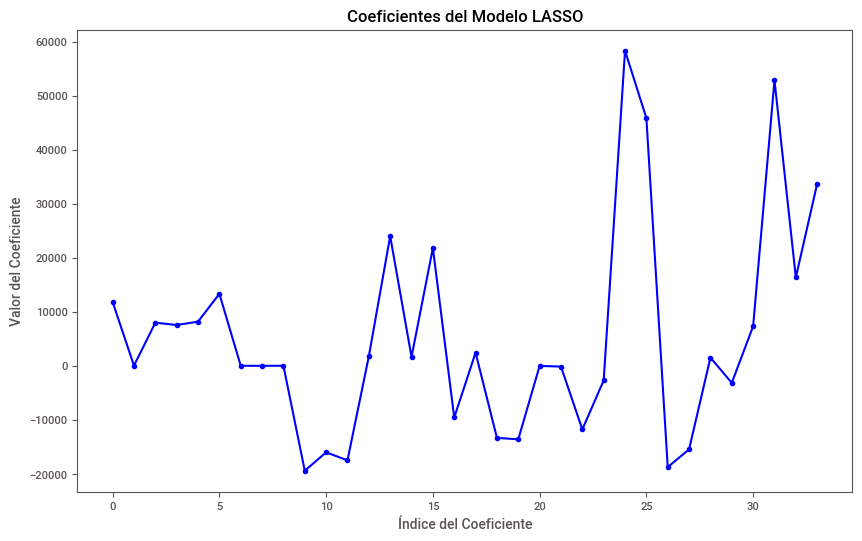

In [36]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Crear el modelo LASSO
alpha = 1  # Parámetro de regularización
lasso_model = Lasso(alpha=alpha, random_state=42)

# Entrenar el modelo
lasso_model.fit(x_train_1, y_train_1)

# Guardar el modelo en archivos
joblib.dump(lasso_model, 'lasso_model.pkl')

# Realizar predicciones en el conjunto de prueba
y_pred = lasso_model.predict(x_test_1)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_train_1, y_pred)
print(f"Error Cuadrático Medio en el Conjunto de Prueba: {mse}")

# Visualizar los coeficientes del modelo
plt.figure(figsize=(10, 6))
plt.plot(range(len(lasso_model.coef_)), lasso_model.coef_, marker='o', linestyle='-', color='b')
plt.title('Coeficientes del Modelo LASSO')
plt.xlabel('Índice del Coeficiente')
plt.ylabel('Valor del Coeficiente')
plt.show()

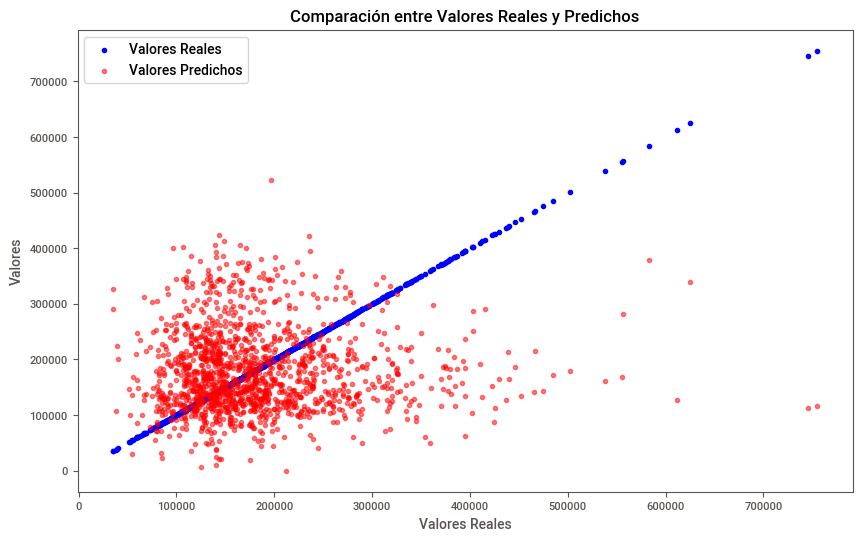

In [37]:
import matplotlib.pyplot as plt

# Supongamos que y_test son los valores reales y y_pred son los valores predichos por tu modelo
# Asegúrate de tener estas variables disponibles antes de ejecutar el código

# Crear un gráfico de dispersión con colores diferentes para valores reales y predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_train_1, y_train_1, color='blue', label='Valores Reales')
plt.scatter(y_train_1, y_pred, color='red', label='Valores Predichos', alpha=0.5)
plt.title('Comparación entre Valores Reales y Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores')
plt.legend()
plt.show()